In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,QuantileTransformer,PowerTransformer,MinMaxScaler
from scipy.stats import boxcox, yeojohnson, skew



In [8]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Guvi\Smartpremium\playground-series-s4e12\train.csv")
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [9]:
df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [10]:
# Calculate mean of non-null values
mean_age = df['Age'].mean()

# Fill NaN values with the mean age
df['Age']=df['Age'].fillna(mean_age)
df['Age'] = df['Age'].astype(int)
df['Age']

0          19
1          39
2          23
3          21
4          21
           ..
1199995    36
1199996    54
1199997    19
1199998    55
1199999    21
Name: Age, Length: 1200000, dtype: int64

In [11]:
#changing into numerical data by Label encoder for Gender.
mapping = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(mapping)
df['Gender']

0          2
1          2
2          1
3          1
4          1
          ..
1199995    2
1199996    1
1199997    1
1199998    1
1199999    2
Name: Gender, Length: 1200000, dtype: int64

In [12]:
# Filling Nulls: Using Mean of 'Annual_Income' Grouped by 'Age'
df['Annual Income'] = df.groupby('Age')['Annual Income'].transform(lambda x: x.fillna(x.mean()))

# Check Missing Values
print("Missing Values:\n", df['Annual Income'].isnull().sum())
df['Annual Income']=df['Annual Income'].astype(int)
df['Annual Income']

Missing Values:
 0


0           10049
1           31678
2           25602
3          141855
4           39651
            ...  
1199995     27316
1199996     35786
1199997     51884
1199998     33042
1199999     32359
Name: Annual Income, Length: 1200000, dtype: int64

In [13]:
#changing into numerical data by Label encoder
mapping = {'Married': 2, 'Divorced': 1, 'Single': 0}
df['Marital Status'] = df['Marital Status'].map(mapping)
df['Marital Status'].value_counts()

Marital Status
0.0    395391
2.0    394316
1.0    391764
Name: count, dtype: int64

In [14]:
# Filling Nulls: Using Mean of 'Marital Status' Grouped by 'Age'
df['Marital Status'] = df.groupby('Age')['Marital Status'].transform(lambda x: x.fillna(x.mean()))

# Check Missing Values
print("Missing Values:\n", df['Marital Status'].isnull().sum())
df['Marital Status']=df['Marital Status'].astype(int)

Missing Values:
 0


In [15]:
#Filling the missing values of number of dependents by grouping the marriage status
df['Number of Dependents'] = df.groupby('Marital Status')['Number of Dependents'].transform(lambda x: x.fillna(x.mean()))

# Check Missing Values
print("Missing Values:\n", df['Number of Dependents'].isnull().sum())
df['Number of Dependents']=df['Number of Dependents'].astype(int)
df['Number of Dependents'].value_counts()

Missing Values:
 0


Number of Dependents
2    324985
3    221475
4    220340
0    218124
1    215076
Name: count, dtype: int64

In [16]:
#Obtaining the unique values of Education Level
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [17]:
#changing into numerical data by Label encoder for Education Level.
mapping = {"Bachelor's" : 2, "Master's":3, 'High School':1, 'PhD':4}
df['Education Level'] = df['Education Level'].map(mapping)
df['Education Level'].value_counts()

Education Level
3    303818
4    303507
2    303234
1    289441
Name: count, dtype: int64

In [18]:
#checking the unique values in Occupation
df['Occupation'].unique()

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

In [19]:
#changing into numerical data by Label encoder for Ocupation
mapping = {'Self-Employed':2, 'Employed':1, 'Unemployed':0}
df['Occupation'] = df['Occupation'].map(mapping)
df['Occupation']

0          2.0
1          NaN
2          2.0
3          NaN
4          2.0
          ... 
1199995    0.0
1199996    2.0
1199997    NaN
1199998    NaN
1199999    NaN
Name: Occupation, Length: 1200000, dtype: float64

In [20]:
#Filling the missing values of Occupation by grouping the Age, Education Level
df['Occupation'] = df.groupby(['Age','Education Level'])['Occupation'].transform(lambda x: x.fillna(x.mean()))

# Check Missing Values
print("Missing Values:\n", df['Occupation'].isnull().sum())
df['Occupation']=df['Occupation'].astype(int)

Missing Values:
 0


In [21]:
df['Occupation'].value_counts()

Occupation
1    534550
0    382805
2    282645
Name: count, dtype: int64

In [22]:
# Filling Nulls: Using Mean of 'Health Score' Grouped by 'Age' and 'Gender'
df['Health Score'] = df['Health Score'].fillna(df.groupby(['Age', 'Gender'])['Health Score'].transform('mean'))

# Check Missing Values
print("Missing Values:\n", df['Health Score'].isnull().sum())

Missing Values:
 0


In [23]:
#Obtaining the unique values of Location
df['Location'].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [24]:
#changing into numerical data by Label encoder for Location.
mapping = {'Urban':3, 'Rural':1, 'Suburban':2}
df['Location'] = df['Location'].map(mapping)
df['Location'].value_counts()

Location
2    401542
1    400947
3    397511
Name: count, dtype: int64

In [25]:
#Unique values of Policy Type
df['Policy Type'].unique()

array(['Premium', 'Comprehensive', 'Basic'], dtype=object)

In [26]:
#changing into numerical data by Label encoder for Policy Type.
mapping = {'Premium':3, 'Comprehensive':2, 'Basic':1}
df['Policy Type'] = df['Policy Type'].map(mapping)
df['Policy Type'].value_counts()

Policy Type
3    401846
2    399600
1    398554
Name: count, dtype: int64

In [27]:
# Filling Nulls: Using Mean of 'Previous Claims' Grouped by 'Policy Type'
df['Previous Claims'] = df['Previous Claims'].fillna(df.groupby(['Policy Type'])['Previous Claims'].transform('mean'))

# Check Missing Values
print("Missing Values:\n", df['Previous Claims'].isnull().sum())

Missing Values:
 0


In [28]:
# Calculate mean of non-null values of Vehicle Age
mean_age = df['Vehicle Age'].mean()

# Fill NaN values with the mean Vehicle Age
df['Vehicle Age']=df['Vehicle Age'].fillna(mean_age)
df['Vehicle Age'] = df['Vehicle Age'].astype(int)
df['Vehicle Age']

0          17
1          12
2          14
3           0
4           8
           ..
1199995     5
1199996    10
1199997    19
1199998     7
1199999    18
Name: Vehicle Age, Length: 1200000, dtype: int64

In [29]:
# Filling Nulls: Using Mean of 'Credit Score' Grouped by 'Age','Gender' and 'Annual Income'
df['Credit Score'] = df['Credit Score'].fillna(df.groupby(['Age','Gender'])['Credit Score'].transform('mean'))

# Check Missing Values
print("Missing Values:\n", df['Credit Score'].isnull().sum())

Missing Values:
 0


In [30]:
# Filling Nulls: Using Mean of 'Insurance Duration' Grouped by 'Policy Type'
df['Insurance Duration'] = df['Insurance Duration'].fillna(df.groupby(['Policy Type'])['Insurance Duration'].transform('mean'))

# Check Missing Values
print("Missing Values:\n", df['Insurance Duration'].isnull().sum())
df['Insurance Duration']=df['Insurance Duration'].astype(int)

Missing Values:
 0


In [31]:
# Convert to datetime
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

# Now extract the year, month, and day
df['year'] = df['Policy Start Date'].dt.year
df['month'] = df['Policy Start Date'].dt.month
df['day'] = df['Policy Start Date'].dt.day

In [32]:
df.drop('Policy Start Date', axis=1, inplace=True)

In [33]:
#checking the unique values in customer feedback
df['Customer Feedback'].unique()



array(['Poor', 'Average', 'Good', nan], dtype=object)

In [34]:
#changing into numerical data by Label encoder for customer feedback.
mapping = {'Poor': 0, 'Average': 1, 'Good': 2}
df['Customer Feedback'] = df['Customer Feedback'].map(mapping)
df['Customer Feedback'].value_counts()

# Filling Nulls: Using Mean of 'Customer Feedback' Grouped by 'Policy Type' and 'Previous Claims'
df['Customer Feedback'] = df['Customer Feedback'].fillna(df.groupby(['Policy Type','Previous Claims'])['Customer Feedback'].transform('mean'))
# Check Missing Values
print("Missing Values:\n", df['Customer Feedback'].isnull().sum())

#Fetching the count under the column customer feedback. 
df['Customer Feedback']=df['Customer Feedback'].astype(int)
df['Customer Feedback'].value_counts()

Missing Values:
 0


Customer Feedback
0    450205
1    381042
2    368753
Name: count, dtype: int64

In [35]:
#changing into numerical data by Label encoder for Smoking Status.
mapping = {'Yes': 1, 'No': 2}
df['Smoking Status'] = df['Smoking Status'].map(mapping)
df['Smoking Status']

0          2
1          1
2          1
3          1
4          1
          ..
1199995    2
1199996    2
1199997    2
1199998    2
1199999    1
Name: Smoking Status, Length: 1200000, dtype: int64

In [36]:
#Obtaining the unique values of Exercise Frequency
df['Exercise Frequency'].unique()

array(['Weekly', 'Monthly', 'Daily', 'Rarely'], dtype=object)

In [37]:
#changing into numerical data by Label encoder for Exercise Frequency.
mapping = {'Weekly': 2, 'Monthly' : 3, 'Daily' : 1, 'Rarely' : 4}
df['Exercise Frequency'] = df['Exercise Frequency'].map(mapping)
df['Exercise Frequency']

0          2
1          3
2          2
3          1
4          2
          ..
1199995    1
1199996    2
1199997    3
1199998    1
1199999    3
Name: Exercise Frequency, Length: 1200000, dtype: int64

In [38]:
#Obtaining the unique values of Property Type
df['Property Type'].unique()

array(['House', 'Apartment', 'Condo'], dtype=object)

In [39]:
#changing into numerical data by Label encoder for Property Type.
mapping = {'House' : 1, 'Apartment' : 2, 'Condo' : 3}
df['Property Type'] = df['Property Type'].map(mapping)
df['Property Type'] 

0          1
1          1
2          1
3          2
4          1
          ..
1199995    2
1199996    2
1199997    3
1199998    2
1199999    1
Name: Property Type, Length: 1200000, dtype: int64

In [40]:
df['Premium Amount'] = df.pop('Premium Amount')
df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,year,month,day,Premium Amount
0,0,19,2,10049,2,1,2,2,22.598761,3,...,372.000000,5,0,2,2,1,2023,12,23,2869.0
1,1,39,2,31678,1,3,3,1,15.569731,1,...,694.000000,2,1,1,3,1,2023,6,12,1483.0
2,2,23,1,25602,1,3,1,2,47.177549,2,...,593.003932,3,2,1,2,1,2023,9,30,567.0
3,3,21,1,141855,2,2,2,1,10.938144,1,...,367.000000,1,0,1,1,2,2024,6,12,765.0
4,4,21,1,39651,0,1,2,2,20.376094,1,...,598.000000,4,0,1,2,1,2021,12,1,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36,2,27316,2,0,3,0,13.772907,3,...,372.000000,3,0,2,1,2,2023,5,3,1303.0
1199996,1199996,54,1,35786,1,2,3,2,11.483482,1,...,597.000000,4,0,2,2,2,2022,9,10,821.0
1199997,1199997,19,1,51884,1,0,3,1,14.724469,2,...,592.143903,6,2,2,3,3,2021,5,25,371.0
1199998,1199998,55,1,33042,0,1,4,1,18.547381,2,...,407.000000,4,0,2,1,2,2021,9,19,596.0


In [41]:
df_train=df.copy()
df_train.head()
df.head()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,year,month,day,Premium Amount
0,0,19,2,10049,2,1,2,2,22.598761,3,...,372.000000,5,0,2,2,1,2023,12,23,2869.0
1,1,39,2,31678,1,3,3,1,15.569731,1,...,694.000000,2,1,1,3,1,2023,6,12,1483.0
2,2,23,1,25602,1,3,1,2,47.177549,2,...,593.003932,3,2,1,2,1,2023,9,30,567.0
3,3,21,1,141855,2,2,2,1,10.938144,1,...,367.000000,1,0,1,1,2,2024,6,12,765.0
4,4,21,1,39651,0,1,2,2,20.376094,1,...,598.000000,4,0,1,2,1,2021,12,1,2022.0


In [42]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,year,month,day,Premium Amount
0,0,19,2,10049,2,1,2,2,22.598761,3,...,372.000000,5,0,2,2,1,2023,12,23,2869.0
1,1,39,2,31678,1,3,3,1,15.569731,1,...,694.000000,2,1,1,3,1,2023,6,12,1483.0
2,2,23,1,25602,1,3,1,2,47.177549,2,...,593.003932,3,2,1,2,1,2023,9,30,567.0
3,3,21,1,141855,2,2,2,1,10.938144,1,...,367.000000,1,0,1,1,2,2024,6,12,765.0
4,4,21,1,39651,0,1,2,2,20.376094,1,...,598.000000,4,0,1,2,1,2021,12,1,2022.0



No outliers found in column: Gender



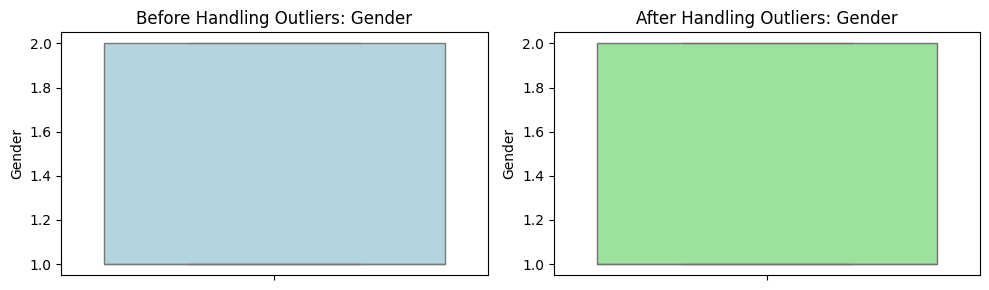


No outliers found in column: Marital Status



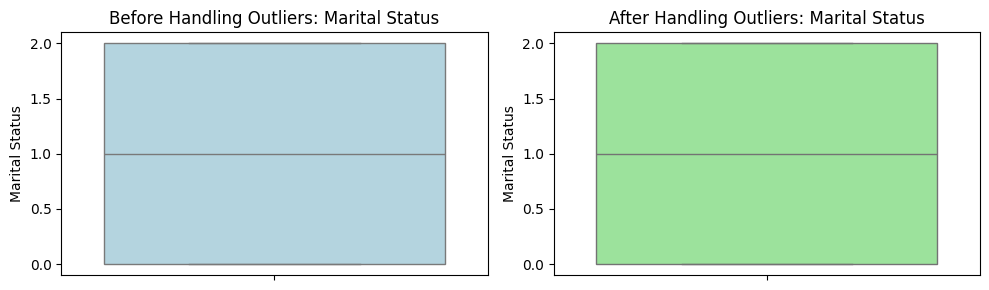


No outliers found in column: Education Level



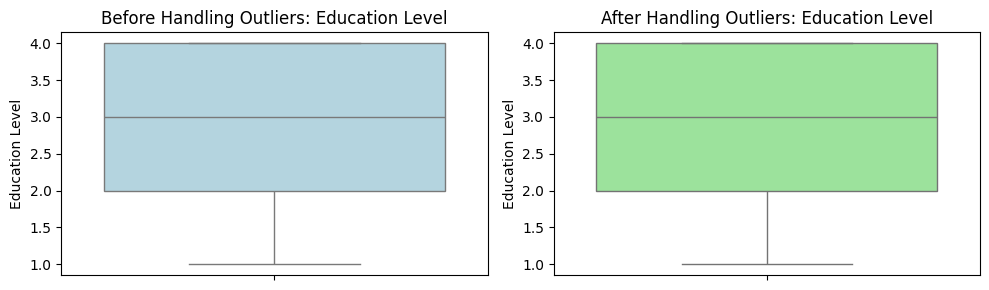


No outliers found in column: Occupation



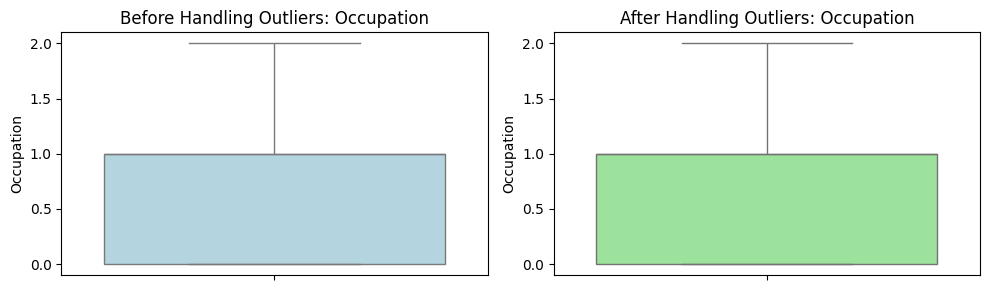


No outliers found in column: Location



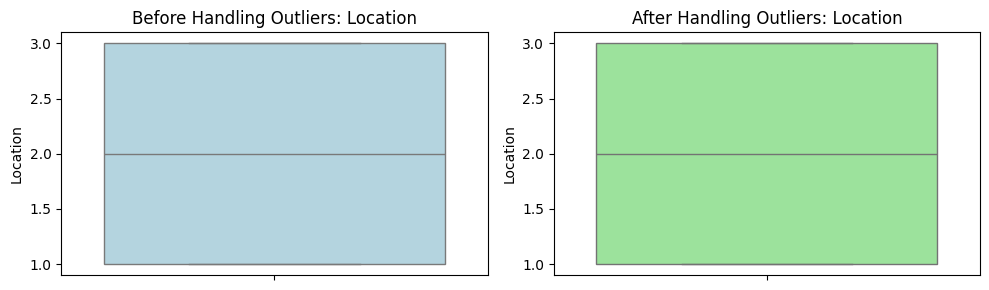


No outliers found in column: Policy Type



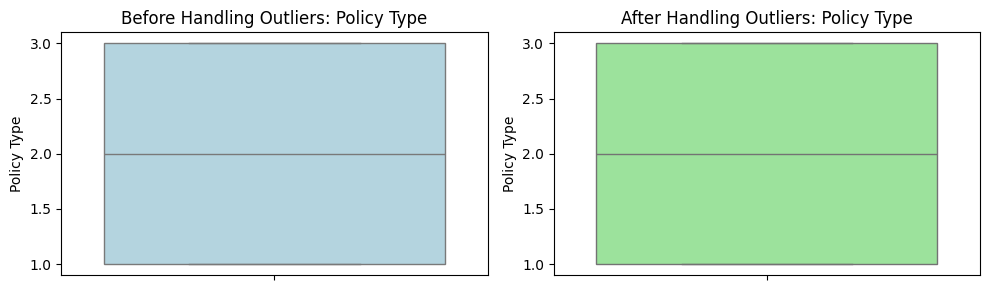


No outliers found in column: Customer Feedback



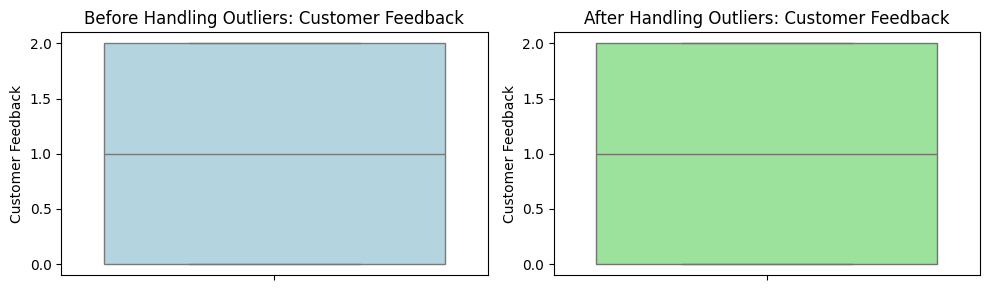


No outliers found in column: Smoking Status



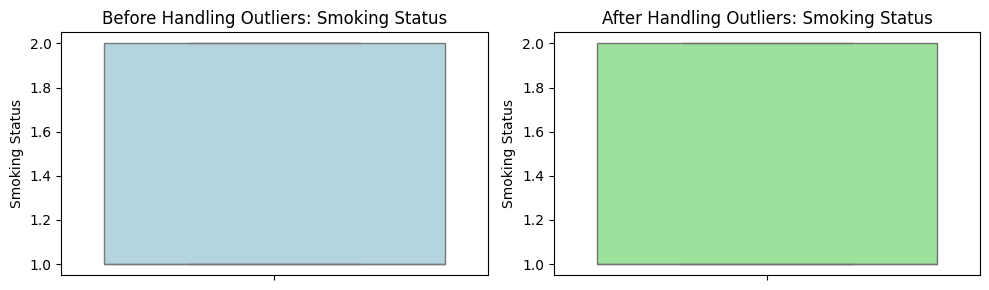


No outliers found in column: Exercise Frequency



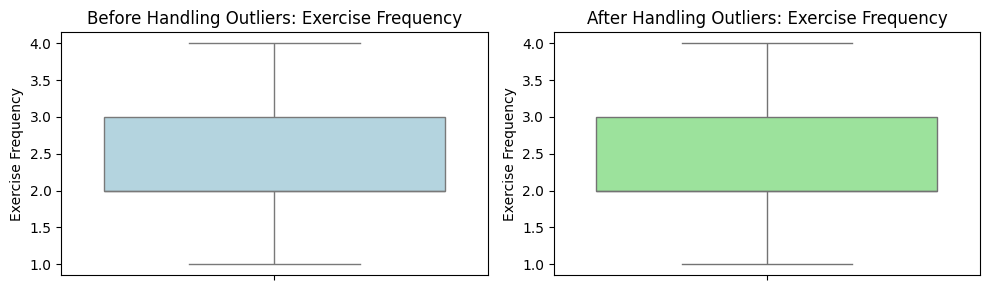


No outliers found in column: Property Type



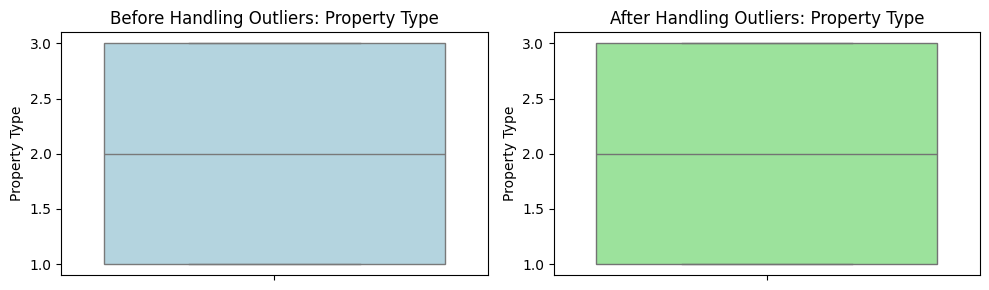

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,year,month,day,Premium Amount
0,0,19,2,10049,2,1,2,2,22.598761,3,...,372.000000,5,0,2,2,1,2023,12,23,2869.0
1,1,39,2,31678,1,3,3,1,15.569731,1,...,694.000000,2,1,1,3,1,2023,6,12,1483.0
2,2,23,1,25602,1,3,1,2,47.177549,2,...,593.003932,3,2,1,2,1,2023,9,30,567.0
3,3,21,1,141855,2,2,2,1,10.938144,1,...,367.000000,1,0,1,1,2,2024,6,12,765.0
4,4,21,1,39651,0,1,2,2,20.376094,1,...,598.000000,4,0,1,2,1,2021,12,1,2022.0


In [43]:
#Detects the outliers in a categorical column and replaces with null. 

def replace_outliers_with_nan(df_train, column):
   
    Q1 = df_train[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_train[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df_train[column] < lower_bound) | (df_train[column] > upper_bound)

    # Plot the boxplot before handling outliers
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_train[column], color='lightblue')
    plt.title(f"Before Handling Outliers: {column}")

    if outliers.sum() == 0:
        print(f"\nNo outliers found in column: {column}")
        print("\n=================================================================")
    else:
        print(f"\n\nOutliers detected in column: {column}")
        print("Replacing outlier values with NaN...")
        print("\n=================================================================")

        # Replace outlier values with NaN
        df_train.loc[outliers, column] = np.nan

    # Plot the boxplot after handling outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[column], color='lightgreen')
    plt.title(f"After Handling Outliers: {column}")

    plt.tight_layout()
    plt.show()

    return df_train

Categorical_data=['Gender',	'Marital Status','Education Level','Occupation','Location','Policy Type','Customer Feedback','Smoking Status','Exercise Frequency','Property Type']

for col in Categorical_data:
    df_train = replace_outliers_with_nan(df_train,col)
df_train.head()

The skew of Age -0.012124023921969315


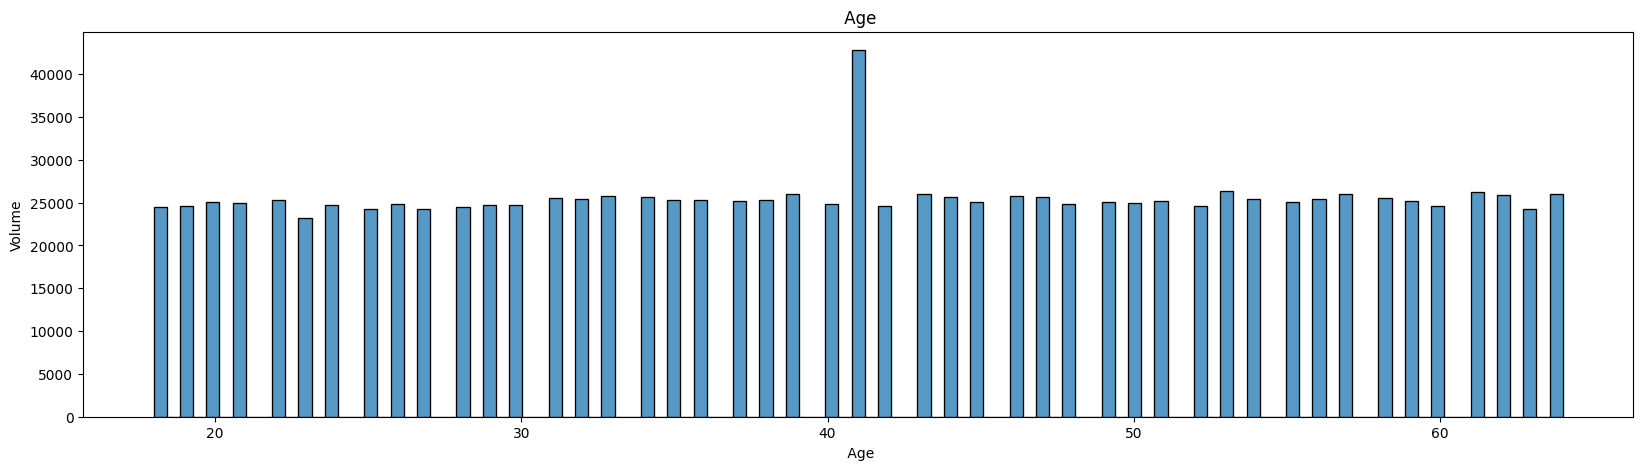

The skew of Annual Income 1.4986853456088098


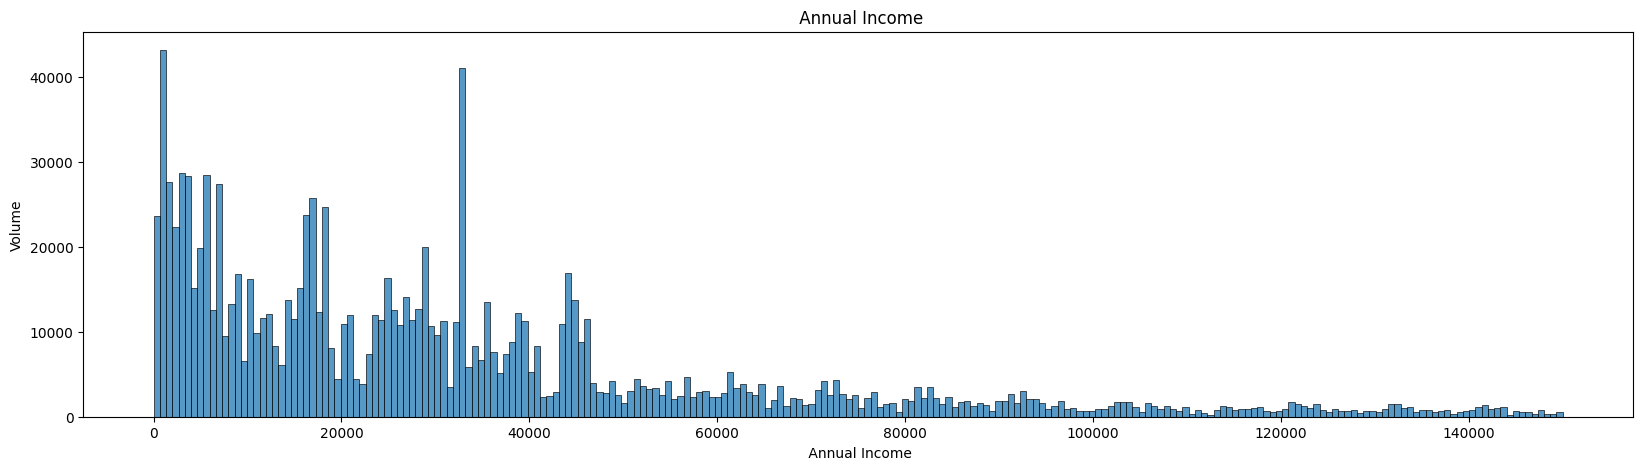

The skew of Number of Dependents -0.011889203411561007


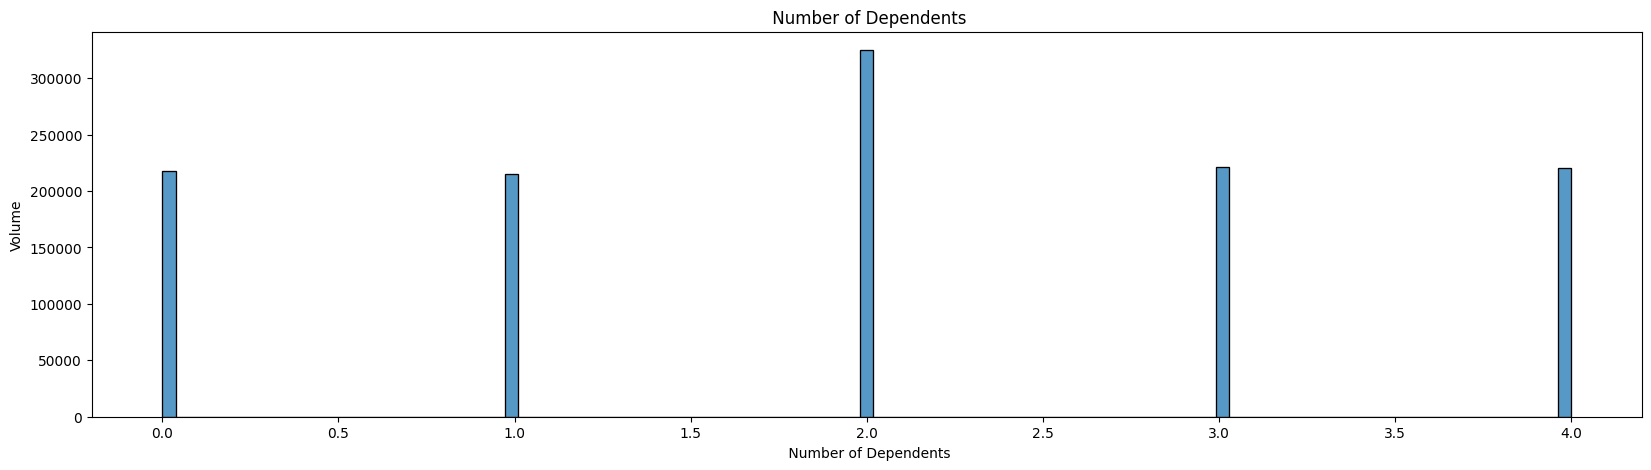

The skew of Health Score 0.29131095402513146


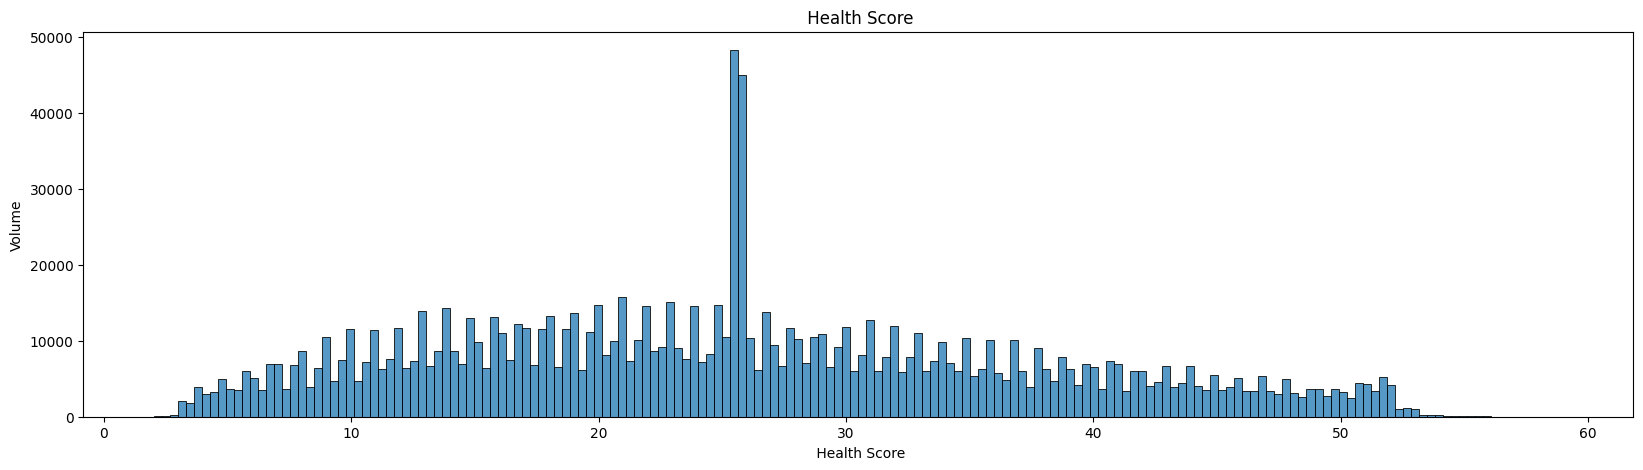

The skew of Vehicle Age -0.020407431184813897


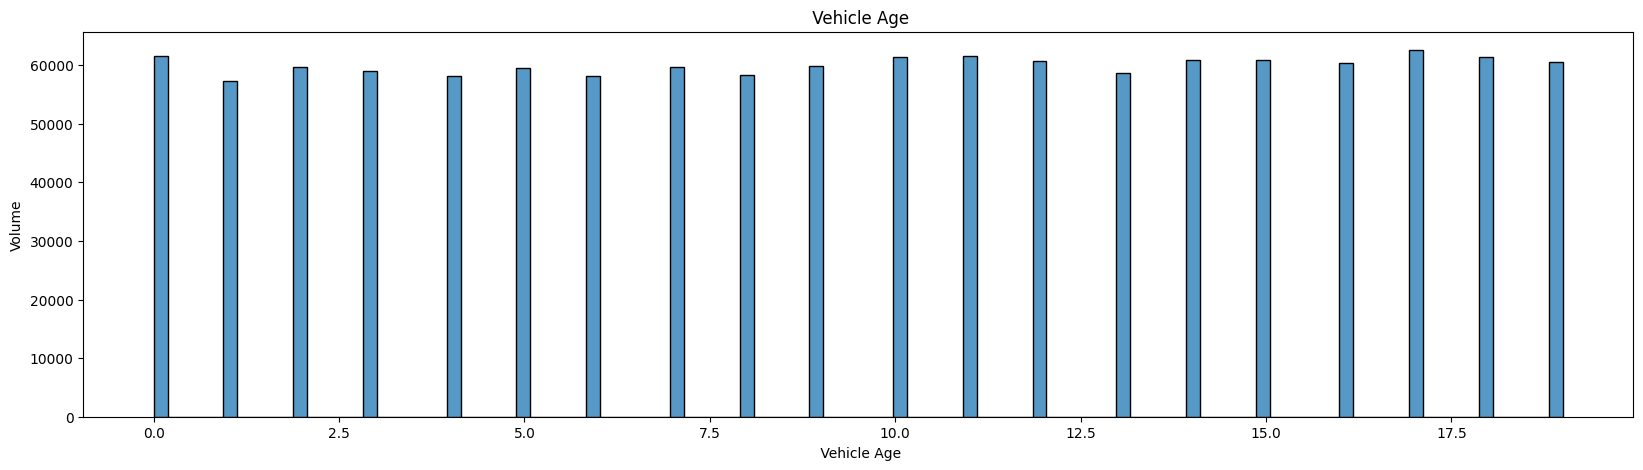

The skew of Credit Score -0.12071512888928694


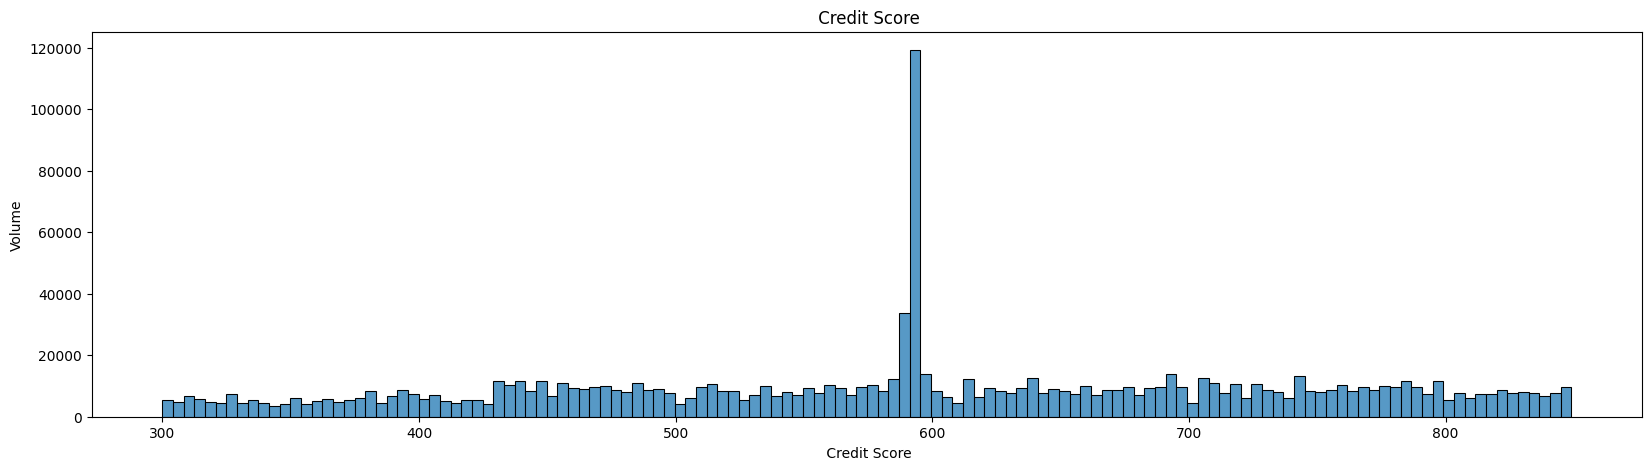

The skew of Insurance Duration -0.008793277419989526


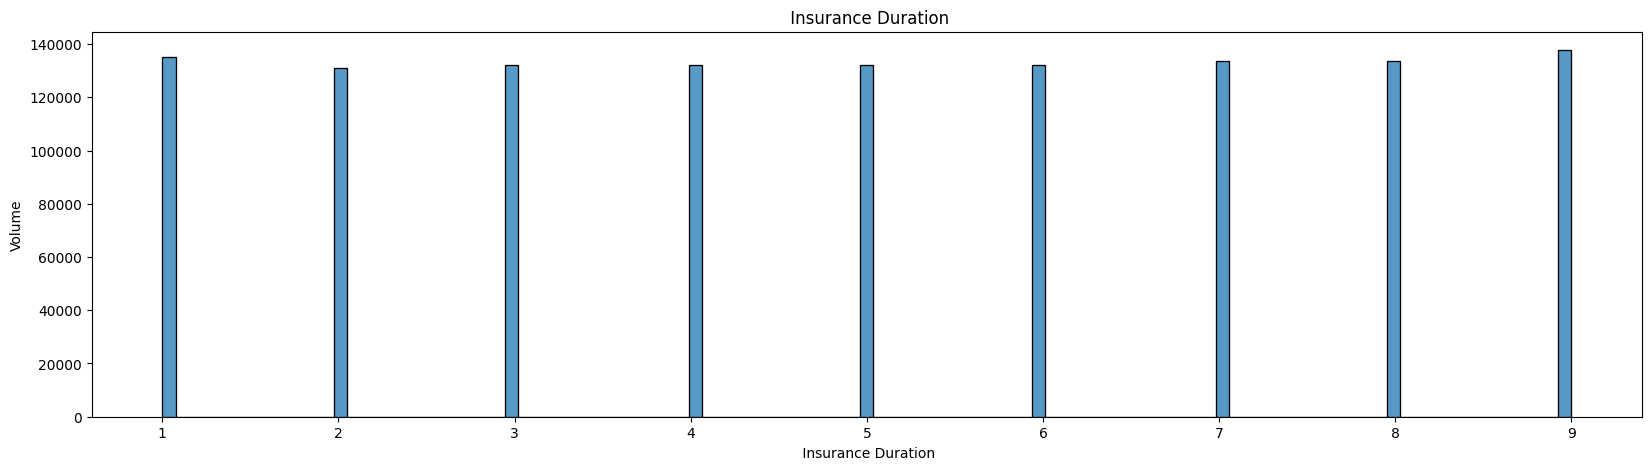

The skew of Premium Amount 1.2409139421441986


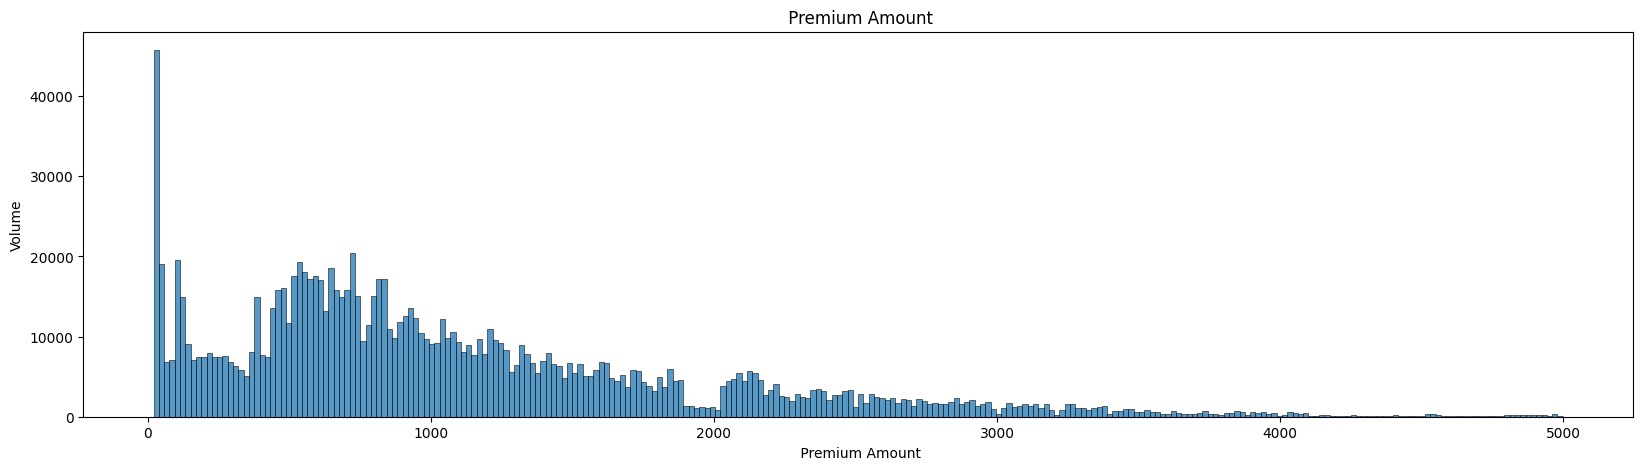

In [44]:
# Analysing the skewness of numerical features
numeric_features = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration','Premium Amount']

for feature in numeric_features:
    print(f"The skew of {feature}",skew(df_train[feature], nan_policy='omit'))
    plt.figure(figsize=(20, 5))
    sns.histplot(x=df_train[feature])
    plt.title(f' {feature}')
    plt.xlabel(f' {feature}')
    plt.ylabel('Volume')
    plt.show()


In [ ]:
#Thus from the above analysis the Annual Income and Premium amount has Skewness. 

Skewness of Original Annual Income: 1.4987
Skewness of Log Annual Income: -1.0588
Skewness of Square Root Annual Income: 0.4611
Skewness of Box-Cox Annual Income: -0.0794
Skewness of Yeo-Johnson Annual Income: -0.0794
Skewness of Original Premium Amount: 1.2409
Skewness of Log Premium Amount: -1.2559
Skewness of Square Root Premium Amount: 0.1993
Skewness of Box-Cox Premium Amount: -0.0578
Skewness of Yeo-Johnson Premium Amount: -0.0578


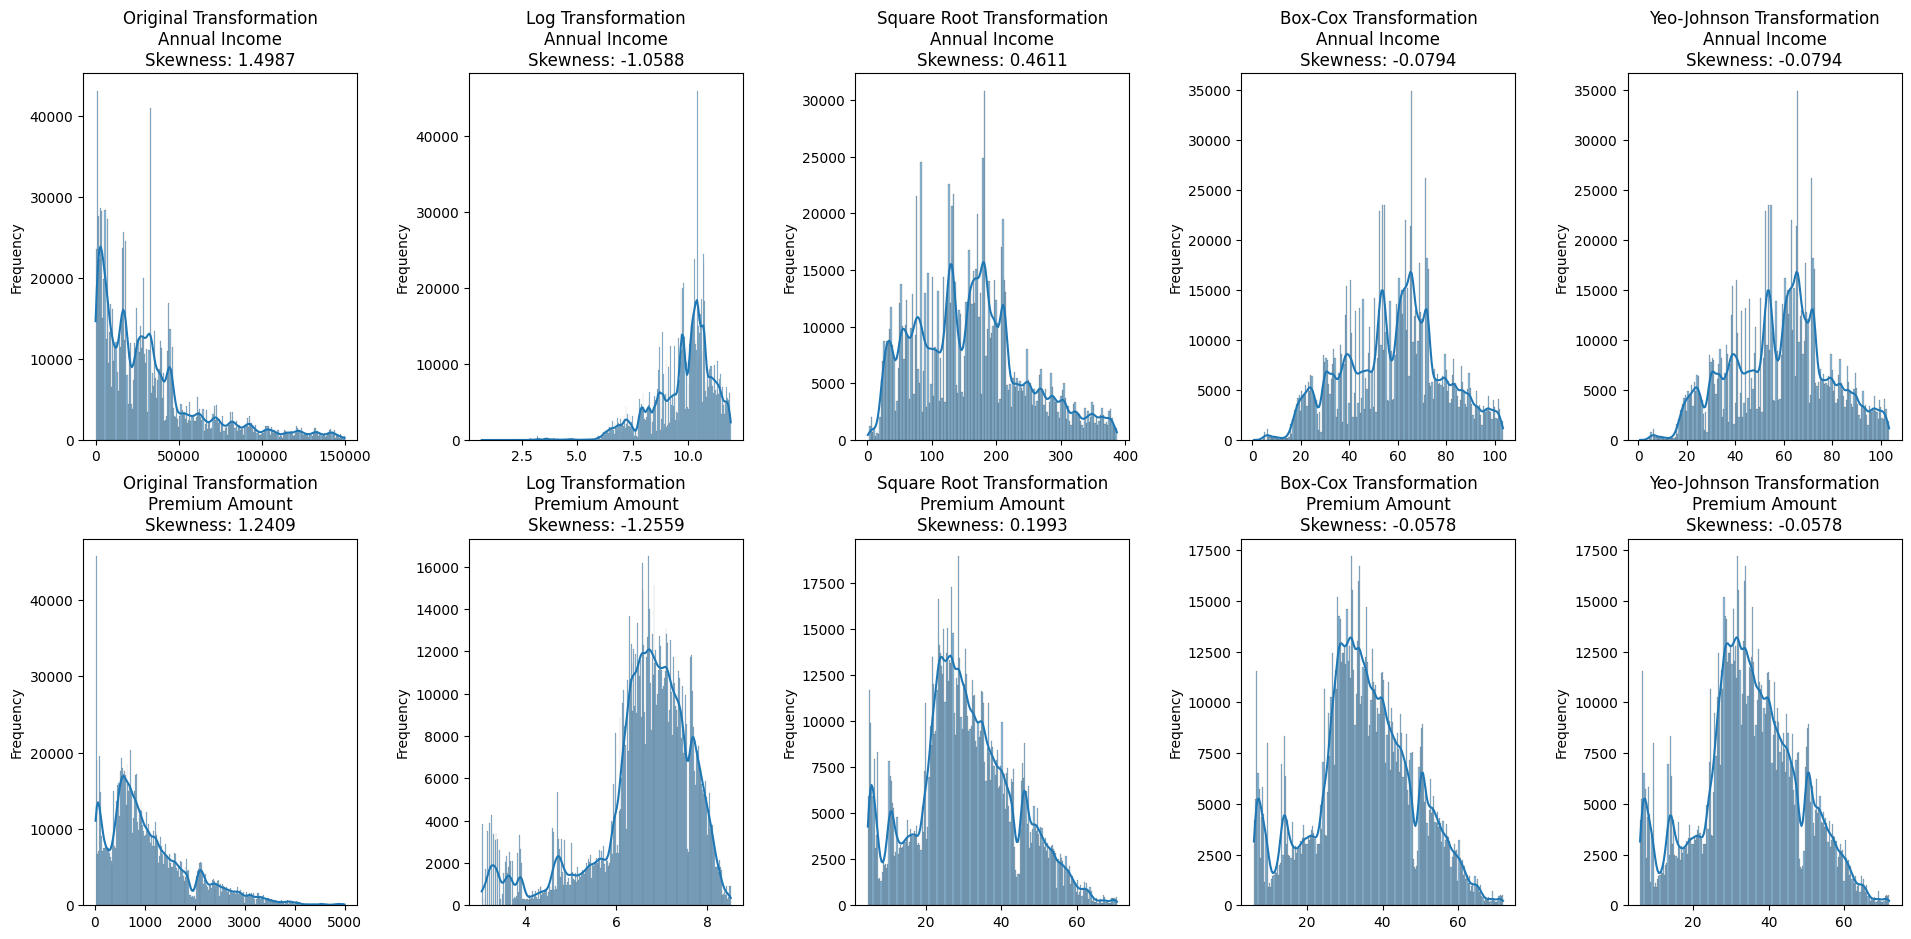

In [45]:

# Function to calculate and print skewness
def calculate_skewness(data, column_name):
    skewness = skew(data)
    print(f'Skewness of {column_name}: {skewness:.4f}')
    return skewness

# Function to plot distributions
def plot_distribution(data, title, ax):
    sns.histplot(data, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Columns to transform
columns = ['Annual Income', 'Premium Amount']

# Initialize plot
fig, axes = plt.subplots(len(columns), 5, figsize=(20, 10))
fig.tight_layout(pad=5.0)

# Transformation methods
transformations = {
    'Original': lambda x: x,
    'Log': np.log1p,  # log(1 + x) to handle zero values
    'Square Root': np.sqrt,
    'Box-Cox': lambda x: boxcox(x + 1)[0],  # Adding 1 to handle zero values
    'Yeo-Johnson': lambda x: yeojohnson(x)[0]
}

for i, column in enumerate(columns):
    original_data = df_train[column].values
    for j, (trans_name, trans_func) in enumerate(transformations.items()):
        try:
            transformed_data = trans_func(original_data)
            transformed_skewness = calculate_skewness(transformed_data, f'{trans_name} {column}')
            plot_distribution(transformed_data, f'{trans_name} Transformation\n{column}\nSkewness: {transformed_skewness:.4f}', axes[i, j])
        except ValueError as e:
            print(f'Could not apply {trans_name} transformation on {column}: {e}')
            axes[i, j].axis('off')

plt.show()


In [46]:
# Columns to transform to remove skewness
columns = ['Annual Income', 'Premium Amount']
for i in columns:
    pt = PowerTransformer(method='yeo-johnson')
    df_train[f'{i}_yj'] = pt.fit_transform(df_train[[i]])
    df_train[f'{i}_BoxCox'], lam = boxcox(df_train[i])


In [47]:
# List of columns to include
columns_to_include = ['Premium Amount', 'Annual Income', 'Annual Income_yj', 'Annual Income_BoxCox', 'Premium Amount_yj', 'Premium Amount_BoxCox']

# Select the specified columns and display their information
df_train[columns_to_include].describe()


,Premium Amount,Annual Income,Annual Income_yj,Annual Income_BoxCox,Premium Amount_yj,Premium Amount_BoxCox
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.102545e+03,3.274524e+04,-1.652480e-15,5.846764e+01,6.441662e-17,3.523285e+01
std,8.649989e+02,3.157111e+04,1.000000e+00,2.027669e+01,1.000000e+00,1.340768e+01
min,2.000000e+01,1.000000e+00,-2.847088e+00,0.000000e+00,-2.193155e+00,5.778188e+00
25%,5.140000e+02,8.646000e+03,-7.309547e-01,4.364689e+01,-5.569826e-01,2.776977e+01
50%,8.720000e+02,2.499600e+04,9.870192e-02,6.046808e+01,-2.609200e-02,3.488241e+01
75%,1.509000e+03,4.393600e+04,6.539281e-01,7.172626e+01,6.566618e-01,4.403337e+01
max,4.999000e+03,1.499970e+05,2.224044e+00,1.035672e+02,2.783534e+00,7.256884e+01


In [48]:
df_train['Annual Income']=df_train['Annual Income_BoxCox']
df_train['Premium Amount']=df_train['Premium Amount_BoxCox']

In [49]:
# List of columns to include
columns_to_include = ['Premium Amount', 'Annual Income', 'Annual Income_yj', 'Annual Income_BoxCox', 'Premium Amount_yj', 'Premium Amount_BoxCox']

# Select the specified columns and display their information
df_train[columns_to_include].describe()

,Premium Amount,Annual Income,Annual Income_yj,Annual Income_BoxCox,Premium Amount_yj,Premium Amount_BoxCox
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,3.523285e+01,5.846764e+01,-1.652480e-15,5.846764e+01,6.441662e-17,3.523285e+01
std,1.340768e+01,2.027669e+01,1.000000e+00,2.027669e+01,1.000000e+00,1.340768e+01
min,5.778188e+00,0.000000e+00,-2.847088e+00,0.000000e+00,-2.193155e+00,5.778188e+00
25%,2.776977e+01,4.364689e+01,-7.309547e-01,4.364689e+01,-5.569826e-01,2.776977e+01
50%,3.488241e+01,6.046808e+01,9.870192e-02,6.046808e+01,-2.609200e-02,3.488241e+01
75%,4.403337e+01,7.172626e+01,6.539281e-01,7.172626e+01,6.566618e-01,4.403337e+01
max,7.256884e+01,1.035672e+02,2.224044e+00,1.035672e+02,2.783534e+00,7.256884e+01


In [50]:
# List of columns to drop
columns_to_drop = ['Annual Income_yj', 'Annual Income_BoxCox', 'Premium Amount_yj', 'Premium Amount_BoxCox']

# Drop the specified columns from the DataFrame
df_train = df_train.drop(columns=columns_to_drop)


In [51]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,year,month,day,Premium Amount
0,0,19,2,45.729093,2,1,2,2,22.598761,3,...,372.000000,5,0,2,2,1,2023,12,23,57.641869
1,1,39,2,64.975596,1,3,3,1,15.569731,1,...,694.000000,2,1,1,3,1,2023,6,12,43.711574
2,2,23,1,60.910026,1,3,1,2,47.177549,2,...,593.003932,3,2,1,2,1,2023,9,30,28.979441
3,3,21,1,101.863174,2,2,2,1,10.938144,1,...,367.000000,1,0,1,1,2,2024,6,12,32.978557
4,4,21,1,69.539782,0,1,2,2,20.376094,1,...,598.000000,4,0,1,2,1,2021,12,1,49.800837


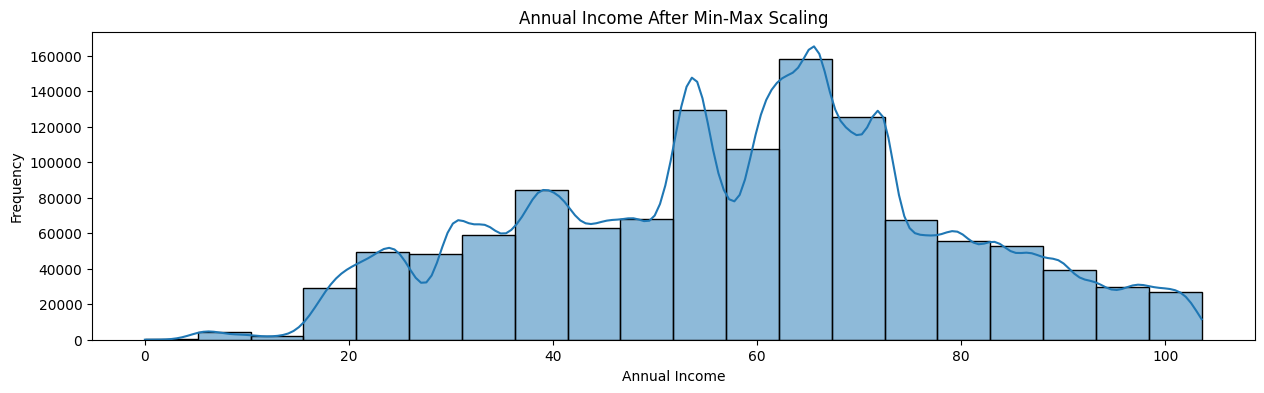

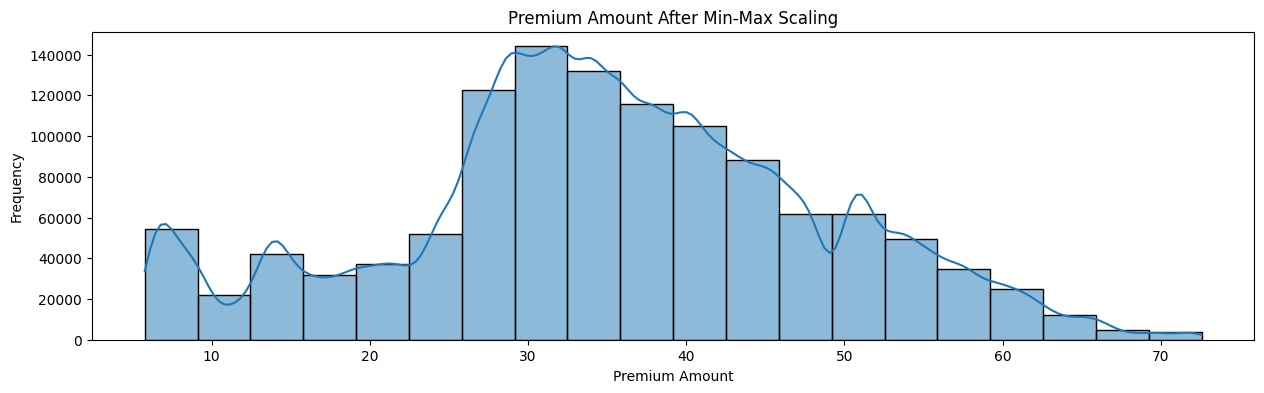

In [52]:
# Assuming df_train is your DataFrame
columns = ['Annual Income', 'Premium Amount']

for col in columns:

    # Plot the distribution after scaling
    plt.figure(figsize=(15, 4))
    sns.histplot(df_train[col], bins=20, kde=True)
    plt.title(f"{col} After Min-Max Scaling")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [53]:
# Assuming df_train is your DataFrame
columns = ['Annual Income', 'Premium Amount']

for col in columns:
    print(f"The skew of {col}",skew(df_train[col], nan_policy='omit'))

The skew of Annual Income -0.0794003661516598
The skew of Premium Amount -0.05840454699577999


In [54]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,year,month,day,Premium Amount
0,0,19,2,45.729093,2,1,2,2,22.598761,3,...,372.000000,5,0,2,2,1,2023,12,23,57.641869
1,1,39,2,64.975596,1,3,3,1,15.569731,1,...,694.000000,2,1,1,3,1,2023,6,12,43.711574
2,2,23,1,60.910026,1,3,1,2,47.177549,2,...,593.003932,3,2,1,2,1,2023,9,30,28.979441
3,3,21,1,101.863174,2,2,2,1,10.938144,1,...,367.000000,1,0,1,1,2,2024,6,12,32.978557
4,4,21,1,69.539782,0,1,2,2,20.376094,1,...,598.000000,4,0,1,2,1,2021,12,1,49.800837


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  int64  
 2   Gender                1200000 non-null  int64  
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  int64  
 5   Number of Dependents  1200000 non-null  int64  
 6   Education Level       1200000 non-null  int64  
 7   Occupation            1200000 non-null  int64  
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  int64  
 10  Policy Type           1200000 non-null  int64  
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  int64  
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [56]:
df_train.to_csv(r"C:\Users\Hp\OneDrive\Documents\Guvi\Smartpremium\playground-series-s4e12\Cleaned_Data.csv")

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
# Assuming df is your DataFrame containing the data
# Define feature columns and target variable

X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [59]:
X

array([[0.000000e+00, 1.900000e+01, 2.000000e+00, ..., 2.023000e+03,
        1.200000e+01, 2.300000e+01],
       [1.000000e+00, 3.900000e+01, 2.000000e+00, ..., 2.023000e+03,
        6.000000e+00, 1.200000e+01],
       [2.000000e+00, 2.300000e+01, 1.000000e+00, ..., 2.023000e+03,
        9.000000e+00, 3.000000e+01],
       ...,
       [1.199997e+06, 1.900000e+01, 1.000000e+00, ..., 2.021000e+03,
        5.000000e+00, 2.500000e+01],
       [1.199998e+06, 5.500000e+01, 1.000000e+00, ..., 2.021000e+03,
        9.000000e+00, 1.900000e+01],
       [1.199999e+06, 2.100000e+01, 2.000000e+00, ..., 2.020000e+03,
        8.000000e+00, 2.600000e+01]], shape=(1200000, 22))

In [60]:
y

array([57.64186927, 43.711574  , 28.97944084, ..., 24.07495623,
       29.61271044, 54.24294675], shape=(1200000,))

In [61]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error', random_state=0, max_depth=5)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=0)

In [66]:
# Predict on training data
y_train_pred = regressor.predict(X_train)

# Predict on testing data
y_test_pred = regressor.predict(X_test)


In [67]:
# Calculate evaluation metrics for training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Training R²: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R²: {test_r2}")


Training RMSE: 13.08693973011385
Training MAE: 10.114525373079877
Training R²: 0.04704107726223361
Testing RMSE: 13.098739772014321
Testing MAE: 10.126790053557027
Testing R²: 0.04622981525717618


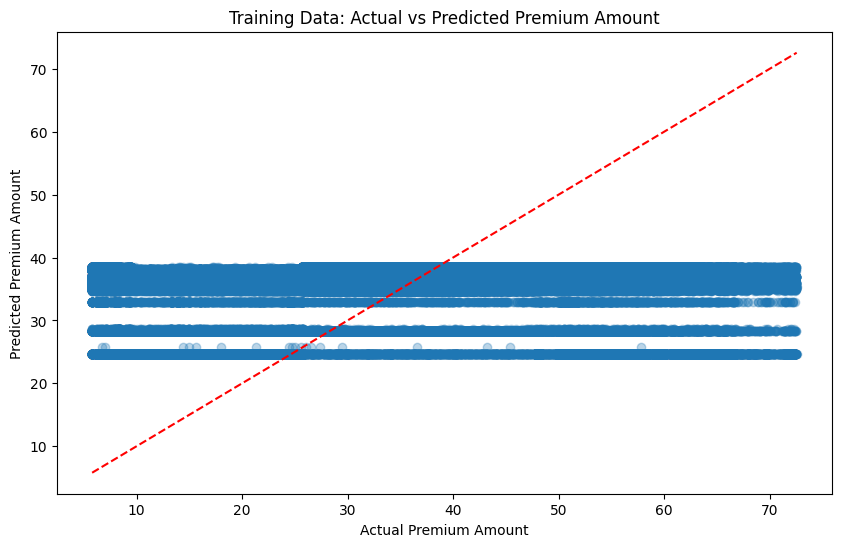

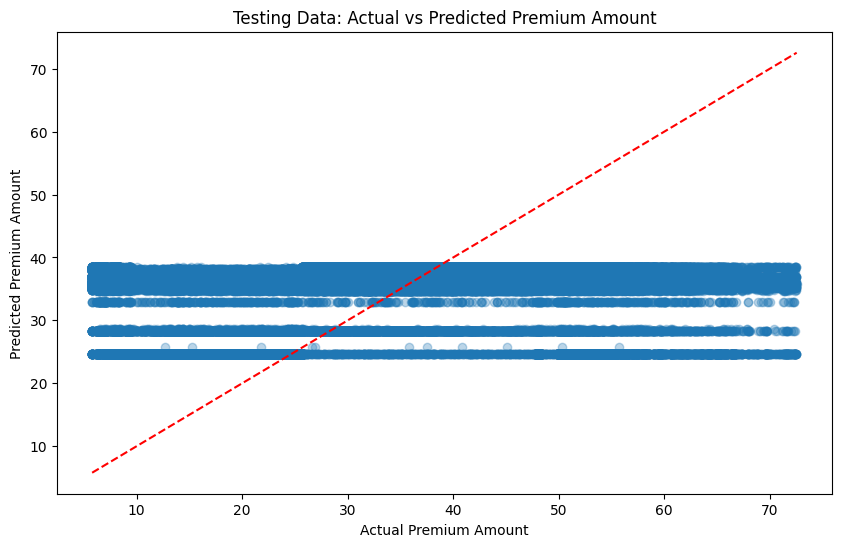

In [68]:
# Plotting residuals for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Training Data: Actual vs Predicted Premium Amount')
plt.show()

# Plotting residuals for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Testing Data: Actual vs Predicted Premium Amount')
plt.show()


In [152]:
y_pred = regressor.predict(X_test)

y_pred

array([1068.80309949, 1120.01469996, 1172.71471633, ..., 1191.96837705,
       1052.72922534, 1164.43873639], shape=(300000,))

In [148]:
y_test

array([2742., 1347., 2196., ...,  689.,  703.,  358.], shape=(300000,))

In [ ]:
# Plotting residuals for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, regressor.predict(y), alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Training Data: Actual vs Predicted Premium Amount')
plt.show()

# Plotting residuals for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Testing Data: Actual vs Predicted Premium Amount')
plt.show()


NameError: name 'feature_columns' is not defined